<a href="https://colab.research.google.com/github/RocketKitty6/employee_retention/blob/main/JURNAL_BRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Memuat data dari file CSV (gantilah 'nama_file.csv' dengan nama file yang sesuai)
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
# Menampilkan informasi umum tentang data
print("Info Data:")
print(data.info())

Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel     

In [7]:
# Menampilkan beberapa baris pertama data
print("\nData Teratas:")
print(data.head())


Data Teratas:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOption

In [8]:
# Statistik deskriptif untuk variabel numerik
print("\nStatistik Deskriptif:")
print(data.describe())


Statistik Deskriptif:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std       

In [9]:
# Mengecek apakah ada nilai yang hilang (missing values) dalam data
print("\nTotal Nilai yang Hilang:")
print(data.isnull().sum())


Total Nilai yang Hilang:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrent

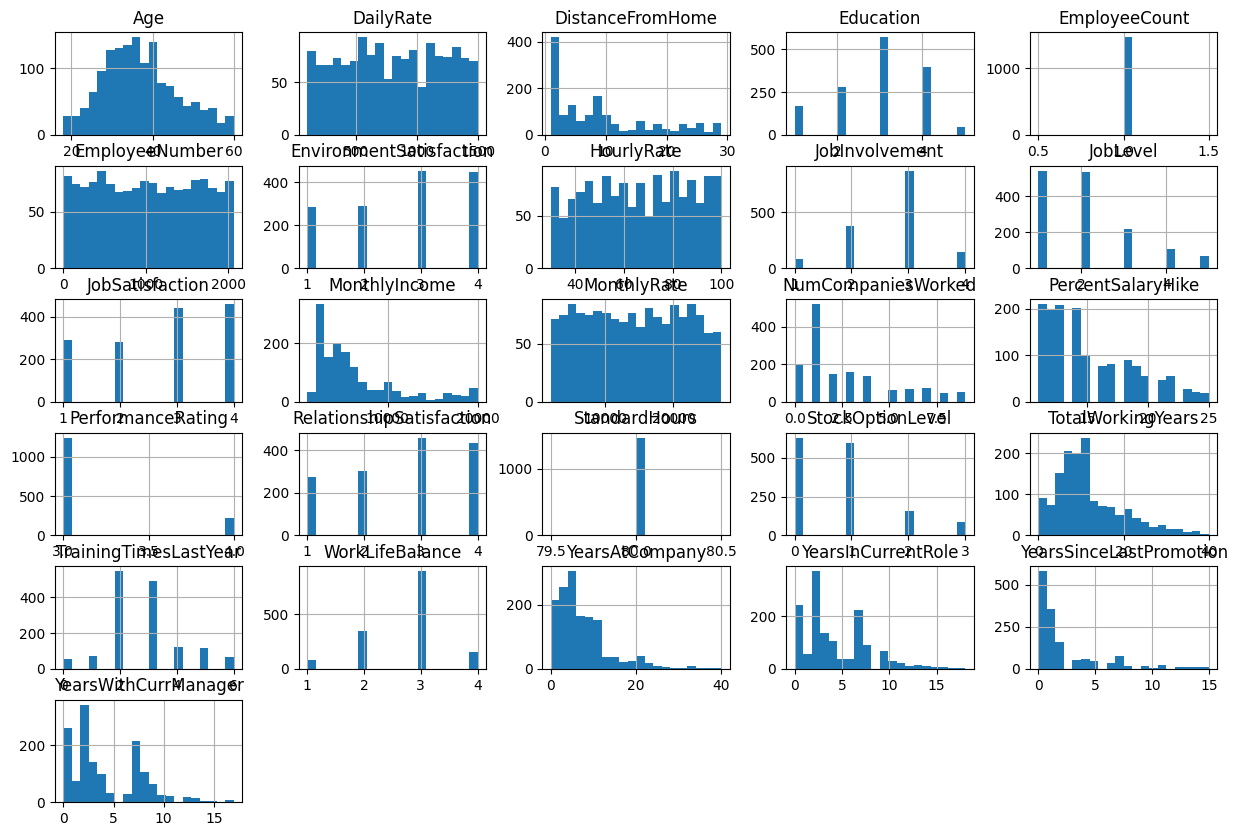

In [10]:
# Visualisasi data dengan histogram untuk variabel numerik
data.hist(bins=20, figsize=(15, 10))
plt.show()

<ipython-input-11-86c6b7a29093>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


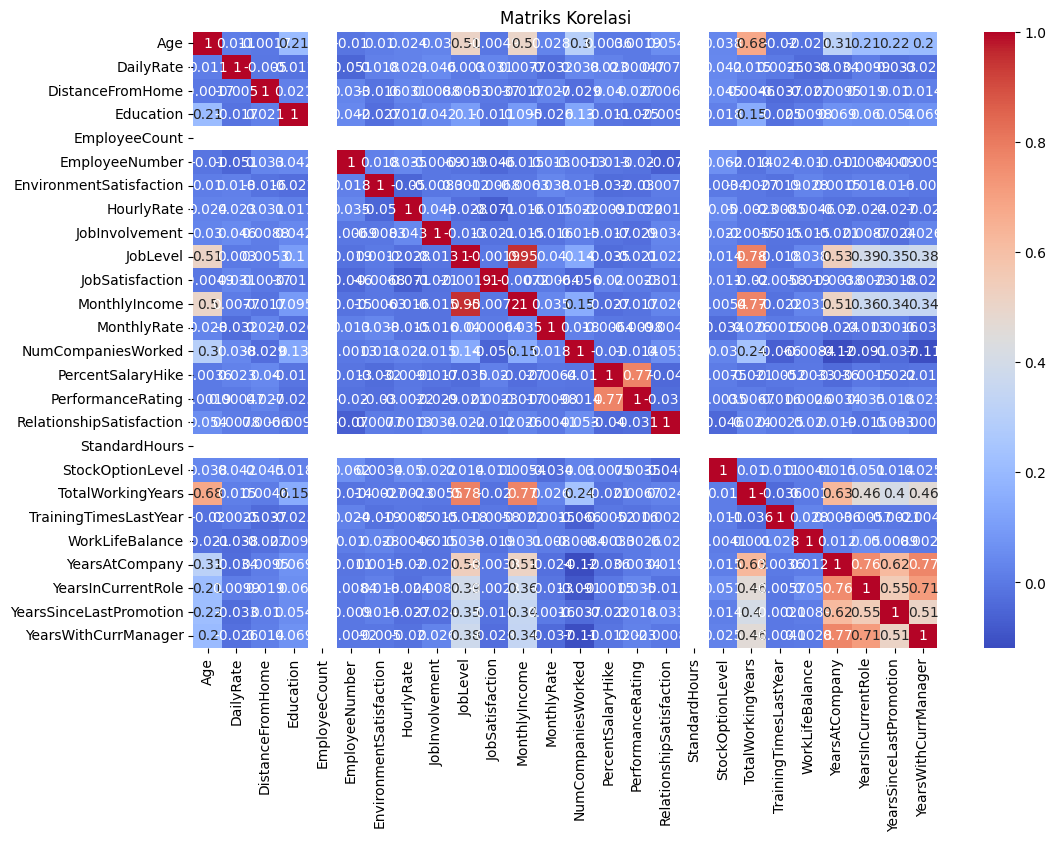

In [11]:
# Visualisasi korelasi antara variabel numerik
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi")
plt.show()

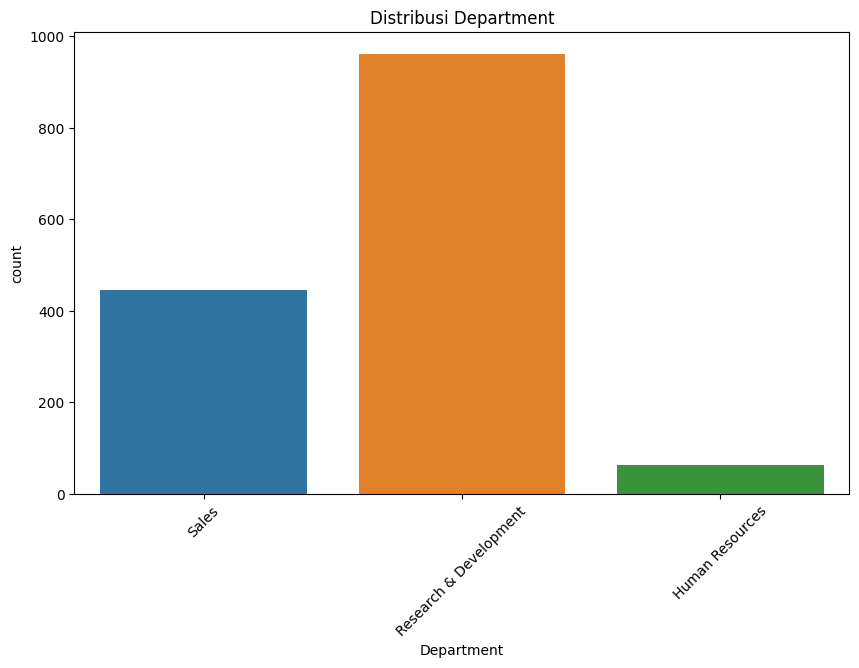

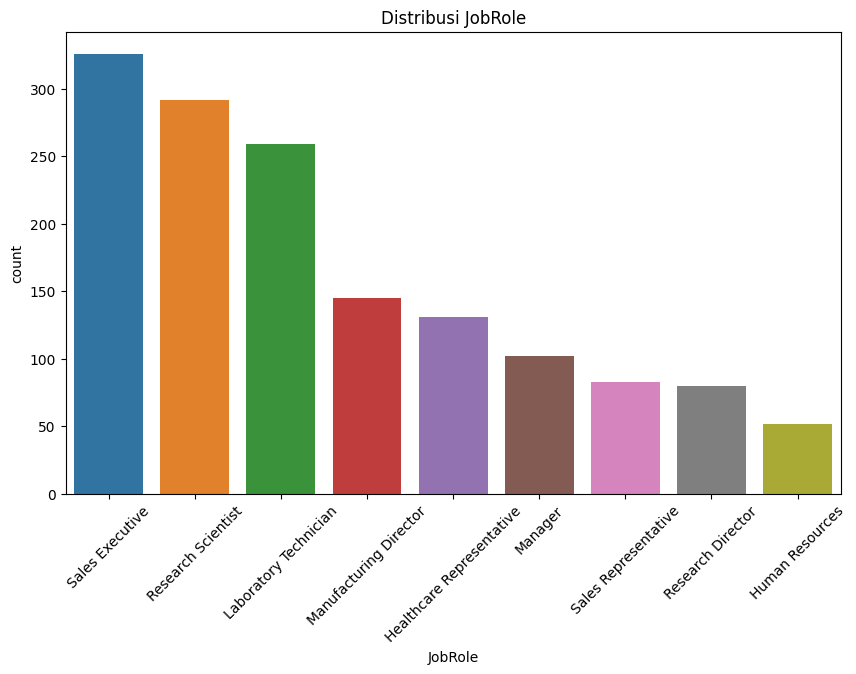

In [12]:
# Visualisasi data kategoris (misalnya, Department, JobRole) dengan diagram batang
categorical_columns = ['Department', 'JobRole']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column)
    plt.title(f"Distribusi {column}")
    plt.xticks(rotation=45)
    plt.show()

In [13]:
# 1. Menggabungkan tingkat pendidikan dengan bidang pendidikan
data['Education_EducationField'] = data['Education'].astype(str) + '_' + data['EducationField']

In [14]:
# 2. Menghitung rata-rata usia pegawai di setiap departemen
department_avg_age = data.groupby('Department')['Age'].mean().reset_index()
department_avg_age.columns = ['Department', 'Avg_Age_in_Department']
data = pd.merge(data, department_avg_age, on='Department', how='left')

In [15]:
# 3. Mengelompokkan umur menjadi kategori (contoh: Muda, Sedang, Tua)
bins = [0, 30, 40, 100]
labels = ['Muda', 'Sedang', 'Tua']
data['Age_Category'] = pd.cut(data['Age'], bins=bins, labels=labels)

In [16]:
# 4. Menentukan lamanya bekerja di perusahaan sebagai rasio dari total pengalaman kerja
data['Tenure_Ratio'] = data['YearsAtCompany'] / data['TotalWorkingYears']

In [17]:
# 5. Membuat fitur dummy untuk variabel kategoris (contoh: Gender)
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

In [18]:
# Menampilkan hasil fitur rekayasa
print(data.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0  ...     

In [19]:
data.to_csv('data_setelah_rekayasa.csv', index=False)

In [21]:
data = pd.read_csv('data_setelah_rekayasa.csv')

In [22]:
# Contoh fitur rekayasa:
# 1. Menghitung rata-rata usia pegawai di setiap departemen (seperti yang dijelaskan sebelumnya)
department_avg_age = data.groupby('Department')['Age'].mean().reset_index()
department_avg_age.columns = ['Department', 'Avg_Age_in_Department']
data = pd.merge(data, department_avg_age, on='Department', how='left')

In [23]:
# 2. Membuat fitur yang menggambarkan pengalaman kerja total per tahun
data['Experience_Per_Year'] = data['TotalWorkingYears'] / (data['NumCompaniesWorked'] + 1)

In [24]:
# 3. Membagi gaji bulanan menjadi kelompok gaji (misalnya, Rendah, Sedang, Tinggi)
data['Salary_Category'] = pd.qcut(data['MonthlyIncome'], q=3, labels=['Rendah', 'Sedang', 'Tinggi'])

In [25]:
# 4. Menghitung rasio antara jam kerja per hari dengan tingkat upah per jam
data['HourlyRate_Efficiency'] = data['HourlyRate'] / data['DailyRate']

In [26]:
# Menampilkan hasil setelah pemrosesan dan rekayasa fitur
print(data.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  YearsWithCurrManager  Education_EducationField  \
0  ...          

In [27]:
data.to_csv('data_setelah_pemrosesan_dan_rekayasa_fitur.csv', index=False)

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [29]:
# Memuat data dari file CSV
data = pd.read_csv('data_setelah_pemrosesan_dan_rekayasa_fitur.csv')

In [30]:
# Menghapus kolom yang tidak diperlukan
columns_to_drop = ['EmployeeCount', 'Over18', 'StandardHours']
data = data.drop(columns=columns_to_drop)

In [31]:
# Mengisi nilai-nilai yang hilang (missing values) dengan nilai yang sesuai
data['NumCompaniesWorked'].fillna(data['NumCompaniesWorked'].median(), inplace=True)
data['TotalWorkingYears'].fillna(data['TotalWorkingYears'].median(), inplace=True)

In [32]:
# Mengatasi variabel kategoris dengan one-hot encoding
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [33]:
# Menormalisasi fitur numerik
numeric_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
                   'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                   'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
                   'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [34]:
print(data.head())

        Age Attrition  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
0  0.446350       Yes   0.742527         -1.010909          2               1   
1  1.322365        No  -1.297775         -0.147150          1               2   
2  0.008343       Yes   1.414363         -0.887515          2               4   
3 -0.429664        No   1.461466         -0.764121          4               5   
4 -1.086676        No  -0.524295         -0.887515          1               7   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2    1.383138               3         2  ...   
1                        3   -0.240677               2         2  ...   
2                        4    1.284725               2         1  ...   
3                        4   -0.486709               3         1  ...   
4                        1   -1.274014               3         1  ...   

   JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager

In [35]:
# Simpan data yang telah diproses ke file CSV jika diperlukan
data.to_csv('data_setelah_pemrosesan.csv', index=False)

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [69]:
# Memuat data dari file CSV
data = pd.read_csv('data_setelah_pemrosesan.csv')

In [70]:
# Memisahkan fitur (X) dan target (y)
X = data.drop(columns=['Attrition'])
y = data['Attrition']

In [71]:
# Melakukan One-Hot Encoding pada variabel kategori
X = pd.get_dummies(X, drop_first=True)

In [72]:
# Memisahkan data menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Menggunakan SimpleImputer untuk mengisi nilai yang hilang dalam data uji
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [75]:
# Pilihan model dan pelatihan
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model_name}, Accuracy: {accuracy:.2f}")

Model: Decision Tree, Accuracy: 0.82
Model: Random Forest, Accuracy: 0.87
Model: Logistic Regression, Accuracy: 0.89
Model: Support Vector Machine, Accuracy: 0.87


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
